In [1]:
import os
from geopy import geocoders
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nltk
import pandas as pd
import re
from nltk import pos_tag, word_tokenize
from wordcloud import WordCloud,STOPWORDS

In [2]:
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
def num_words(string):
    words = re.findall("[a-zA-Z_]+", string)
    num_words = len(words)
    return(num_words)

df['desc_len'] = df['description'].apply(num_words)

In [23]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,desc_len,desc_clean
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,59,this tremendous 100 varietal wine hails from ...
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,50,ripe aromas of fig blackberry and cassis are ...
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,47,mac watson honors the memory of a wine once ma...
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,60,this spent 20 months in 30 new french oak an...
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,65,this is the top wine from la b gude named aft...


### Word Cloud

In [5]:
def remove_weird_char(string):
    import re
    string = string.lower()
    words = string.split()
    refined = []
    for i in words:
        refined.append(re.sub("[^\w]+", " ", i))
    sentence = ' '.join([word for word in refined])
    return(sentence)

In [6]:
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
def rmStopWords(text):
        text = ' '.join([word for word in text.split() if word not in cachedStopWords])
        return(text)
    
def rep_punct(text):
    return text.lower().replace('.',' ').replace('!',' ').replace(',',' ').replace('?',' ').replace(')',' ').replace('(',' ')

In [7]:
df["desc_clean"] = df["description"].apply(remove_weird_char)
desc_dets = df["desc_clean"].str.cat(sep=" ")
desc_dets_clean = rmStopWords(desc_dets)

In [8]:
words = ' '.join(df["desc_clean"])
cleaned_word = " ".join([word for word in words.split()])

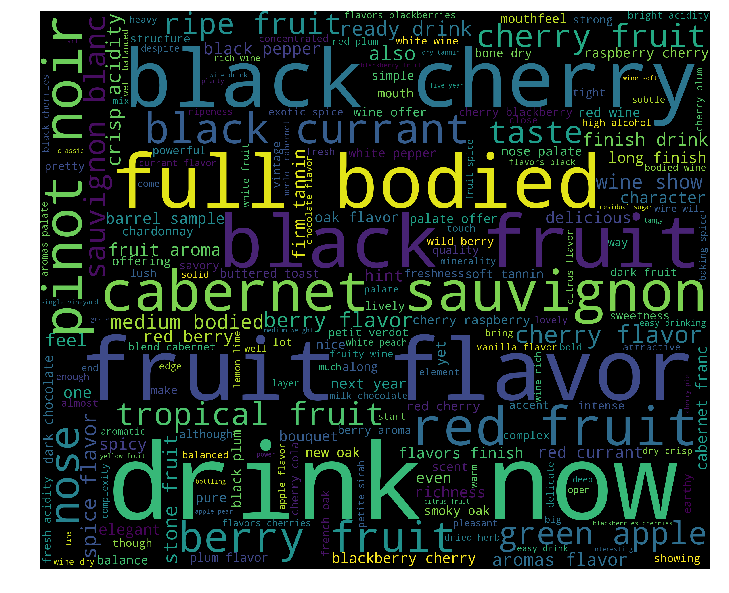

In [9]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Wine Description by Region

In [12]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

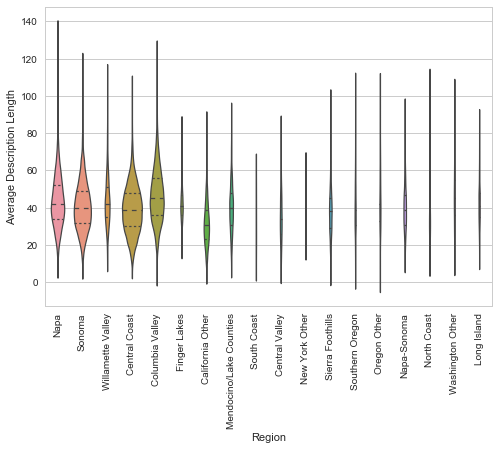

In [13]:
sns.violinplot(x="region_2", y="desc_len",
    data=df,split=True, linewidth=1.25,
              inner="quartile", scale='count')
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average Description Length")
plt.show()

### Wine Description by Country (Find a different method to plot this)
Point is to see if language barrier forces the French and others to explain less or more in the descriptions?

In [65]:
sel_countries = (df['country'].value_counts() > 500)
countries_df = df[df["country"].isin(sel_countries[sel_countries==True].index)]

14

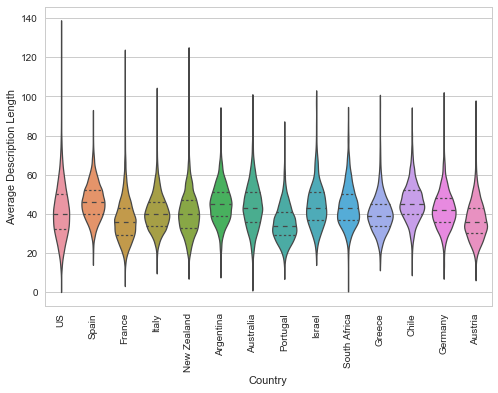

In [69]:
sns.violinplot(x="country", y="desc_len",
    data=countries_df,split=True, linewidth=1.25,inner="quartile")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Description Length")
plt.show()

### Wine Description by Variety

Notes: Look at the average description length (# of words) in wines from (different regions or variety). Scale the plot by count, so essentially the fatter violins have more wines

In [10]:
### Currently getting an error here. 
df['variety'] = df['variety'].str.decode('utf-8').str.encode('utf-8')

In [ ]:
sns.violinplot(x="variety", y="desc_len",
    data=df,split=True, linewidth=1.25,inner="quartile", scale='count')
plt.xticks(rotation=90)
plt.xlabel("Variety")
plt.ylabel("Average Description Length")
plt.show()

### Wine by Region

In [14]:
reg_df = pd.crosstab(df['variety'],df['region_2'])
### Just show the Major Wine Varieties. 
reg_df = reg_df[reg_df.sum(axis=1) > 500]
reg_df

region_2,California Other,Central Coast,Central Valley,Columbia Valley,Finger Lakes,Long Island,Mendocino/Lake Counties,Napa,Napa-Sonoma,New York Other,North Coast,Oregon Other,Sierra Foothills,Sonoma,South Coast,Southern Oregon,Washington Other,Willamette Valley
variety,,,,,,,,,,,,,,,,,,
Bordeaux-style Red Blend,25,300,9,524,35,39,18,548,8,4,6,14,6,177,7,0,22,1
Cabernet Franc,11,102,13,250,113,54,15,168,0,17,10,4,43,66,3,25,9,0
Cabernet Sauvignon,412,937,99,1396,65,37,196,4081,46,3,99,39,66,1378,20,39,85,0
Chardonnay,480,2295,67,610,268,150,203,737,598,21,53,42,25,2041,12,22,83,283
Merlot,379,435,29,874,43,219,81,728,95,18,38,8,11,469,14,33,63,0
Petite Sirah,74,239,77,27,0,0,85,133,0,0,22,0,47,147,3,13,0,0
Pinot Gris,8,105,2,116,42,4,43,7,7,0,0,103,0,57,0,38,17,285
Pinot Noir,249,3032,9,17,77,14,574,88,635,20,90,206,10,2946,0,77,11,2194
Red Blend,361,515,85,1260,20,31,120,345,18,7,42,29,61,214,19,37,64,8


### Wine Prices (Potentially Facet/Subplot) these

#### By Region

In [15]:
wines_region_df = df.groupby(['region_2'])

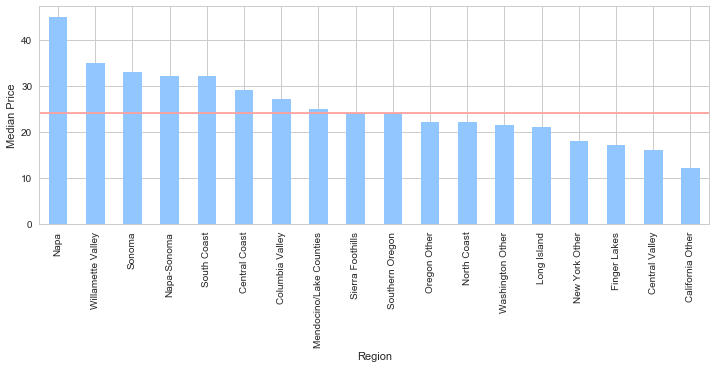

In [16]:
plt.figure() 
wines_region_df.median(skipna=True)['price'].sort_values(ascending=False).dropna().plot(figsize=(12,4), kind='bar')
plt.axhline(df.price.median(), color='r')
plt.xlabel('Region')
plt.ylabel('Median Price (USD$)')

#### By Variety (Downselect for varieties with at least 500 wines or more)

In [17]:
mask1 = df['variety'].isin(reg_df.index)
wines_variety_df = df[mask1].groupby(['variety'])

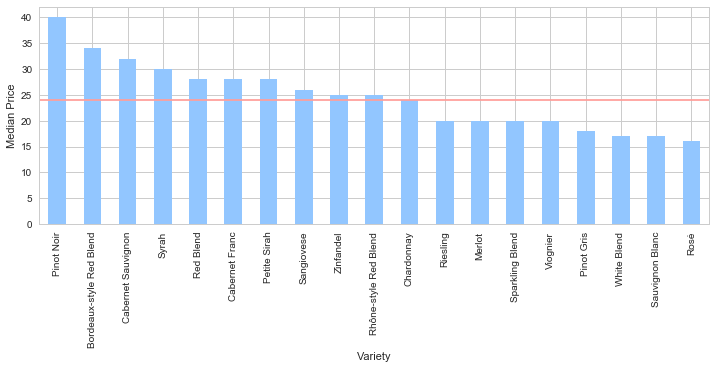

In [18]:
plt.figure() 
wines_variety_df.median(skipna=True)['price'].sort_values(ascending=False).dropna().plot(figsize=(12,4), kind='bar')
plt.axhline(df.price.median(), color='r')
plt.xlabel('Variety')
plt.ylabel('Median Price (USD$)')

### Map Wines around the World (By Count and Maybe Variety?)

In [19]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geo_code_loc(reg,prov):
    print reg + ', ' + prov
    if(pd.isnull(reg)):
        loc = location = geolocator.geocode(prov)
    elif(pd.isnull(prov)):
        loc = location = geolocator.geocode(reg)
    else:
        raw_loc = reg + prov
        loc = location = geolocator.geocode(raw_loc)
    #ret_val = tuple(loc.latitude,loc.longitude)
    return(loc)

In [20]:
mask1 = df['variety'].isin(reg_df.index)
map_df = df[mask1]

In [21]:
unique_map_df = map_df[['region_1','country']].drop_duplicates()

In [22]:
unique_map_df['loc'] = unique_map_df.apply(lambda x: geo_code_loc(unique_map_df['region_1'],unique_map_df['country']),axis=1)

0                                         Napa Valley, US
2                                      Knights Valley, US
3                                   Willamette Valley, US
8                                  Chehalem Mountains, US
9                                        Sonoma Coast, US
11                                       Ribbon Ridge, US
12                                       Dundee Hills, US
16                          Diamond Mountain District, US
23                                        Edna Valley, US
24                               Santa Cruz Mountains, US
25                                                    NaN
28                              Santa Lucia Highlands, US
29                            Walla Walla Valley (WA), US
31                               Russian River Valley, US
32                          Brunello di Montalcino, Italy
33                                   Vin Mousseux, France
34                               Columbia Valley (WA), US
37            

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', u'occurred at index 0')